In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'pet_expression/train'
data_test_path = 'pet_expression/test'
data_valid_path = 'pet_expression/valid'

In [3]:
img_width = 180
img_height = 180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1000 files belonging to 4 classes.


In [6]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
data_cat = data_train.class_names
data_cat

['Angry', 'Other', 'Sad', 'happy']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_valid_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 36 files belonging to 4 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 38 files belonging to 4 classes.


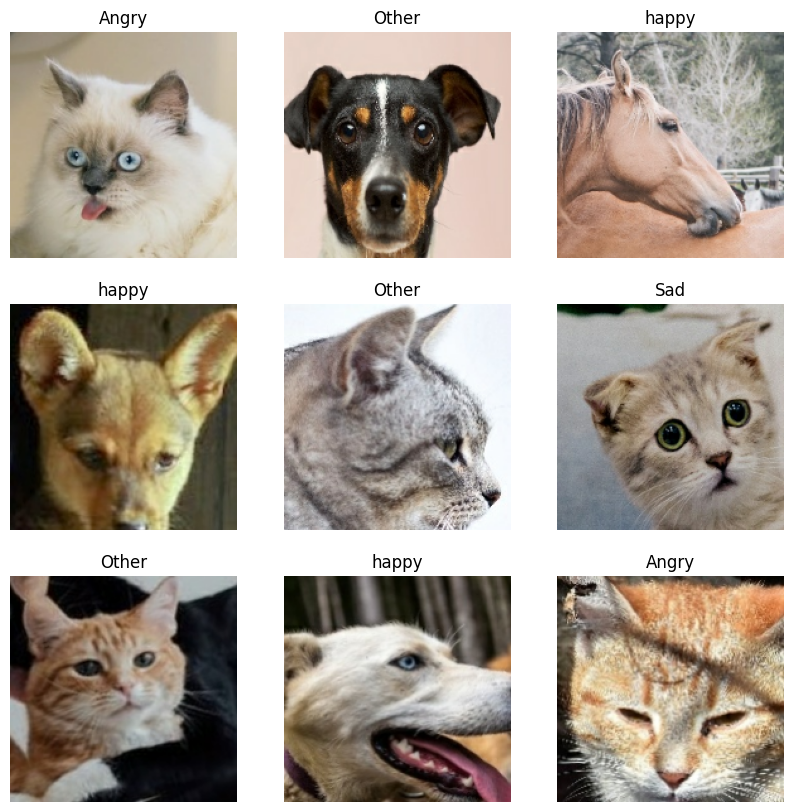

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 50
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.2835 - loss: 1.6400 - val_accuracy: 0.2500 - val_loss: 1.3960
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.3706 - loss: 1.3451 - val_accuracy: 0.4167 - val_loss: 1.4311
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.4907 - loss: 1.1660 - val_accuracy: 0.2222 - val_loss: 1.4126
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.5917 - loss: 1.0174 - val_accuracy: 0.3056 - val_loss: 1.4425
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.7138 - loss: 0.7448 - val_accuracy: 0.3056 - val_loss: 1.7520
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.7888 - loss: 0.5686 - val_accuracy: 0.3056 - val_loss: 2.0862
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.8610 - loss: 0.4024 - val_accuracy: 0.3056 - val_loss: 2.6386
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9150 - loss: 0.2446 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

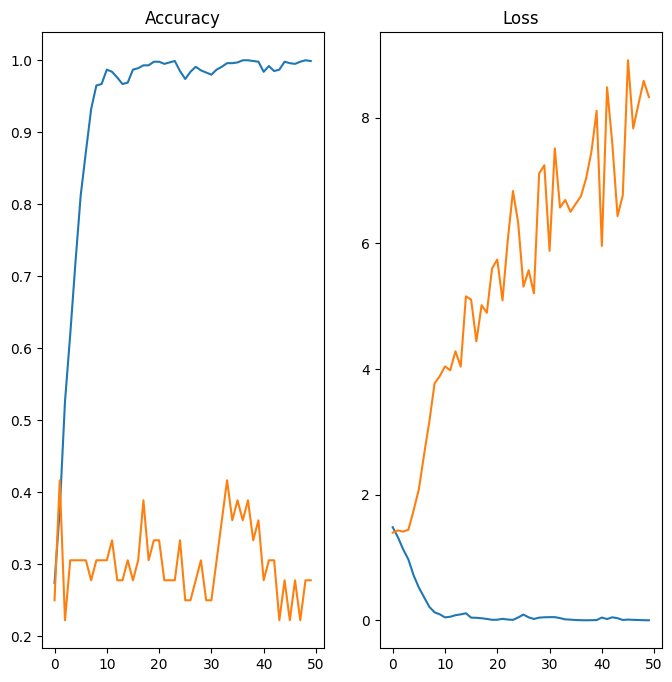

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')